# Data Loading_파일 불러오기

In [24]:
# import module

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [25]:
# read file

file_path = r'C:\Users\황주신\Documents\University\3학년\1학기\01. 인공지능개론\03. 실습, 과제\W5\iris\iris.data'
index = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data = pd.read_csv(file_path, header = None )
df = pd.DataFrame(data)

df.columns = index

df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
# 컬렴명 확인
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

# Data Loading_그래프로 확인

In [27]:
#import module

import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Class')

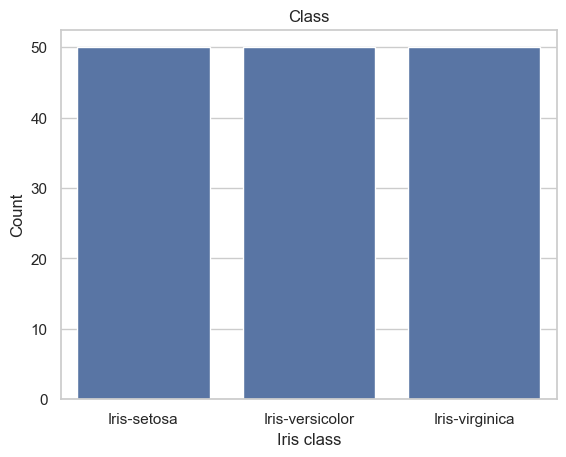

In [28]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("Iris class")
plt.ylabel("Count")
plt.title("Class")

In [29]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [30]:
# 결측치 확인
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

C:\Users\황주신\AppData\Local\Temp\ipykernel_10552\2689981661.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal length'], kde = True, hist = False, ax=ax1)
C:\Users\황주신\AppData\Local\Temp\ipykernel_10552\2689981661.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['petal l

<Axes: xlabel='petal length', ylabel='Density'>

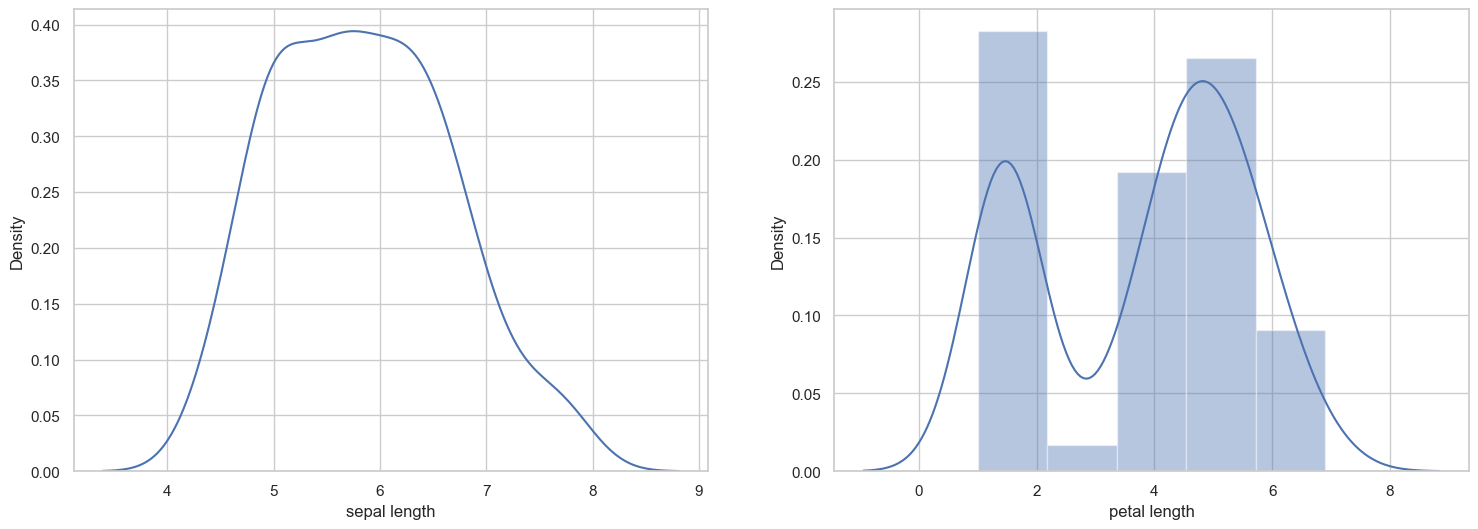

In [31]:
# 컬럼별 히스토그램 확인
# 'sepal length'와'petal length' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['sepal length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['petal length'], ax=ax2)

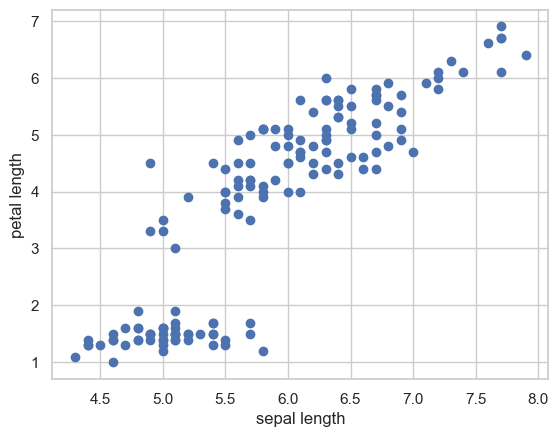

In [32]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['sepal length'], df['petal length'])
plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.show()

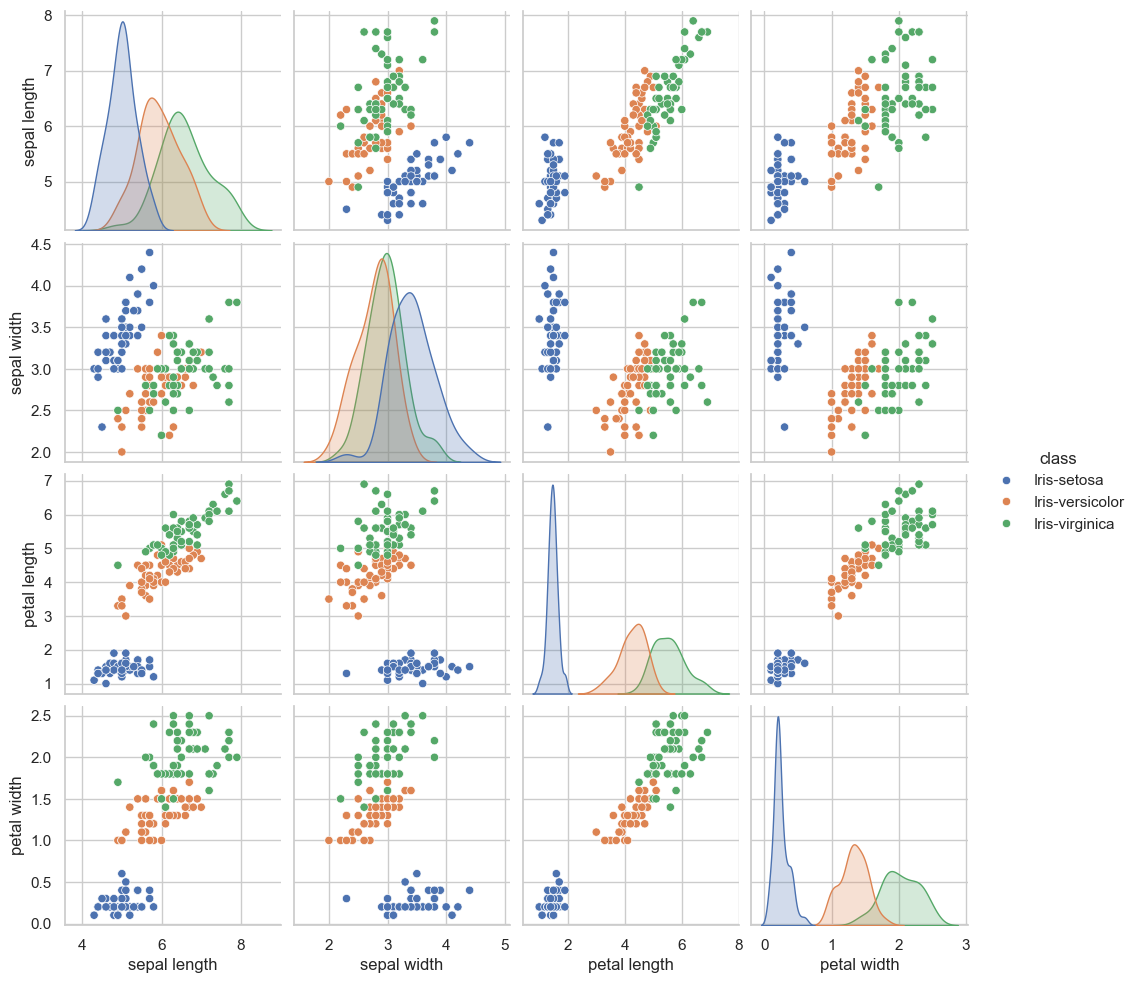

In [33]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['sepal length', 'sepal width', 'petal length', 'petal width'],
            hue ='class')
plt.show()

C:\Users\황주신\AppData\Local\Temp\ipykernel_10552\3016991016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sepal length", data=df, palette="Set3")


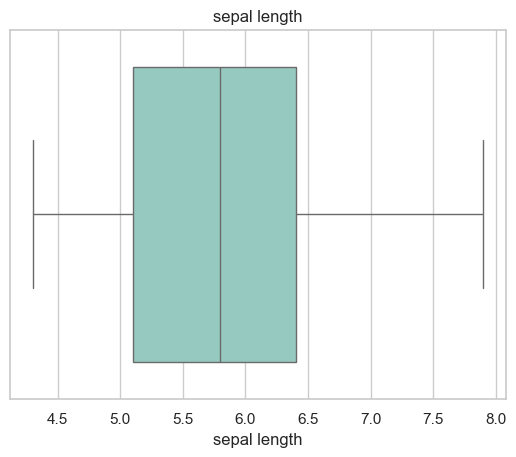

In [34]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="sepal length", data=df, palette="Set3")
plt.title("sepal length")
plt.show()

C:\Users\황주신\AppData\Local\Temp\ipykernel_10552\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


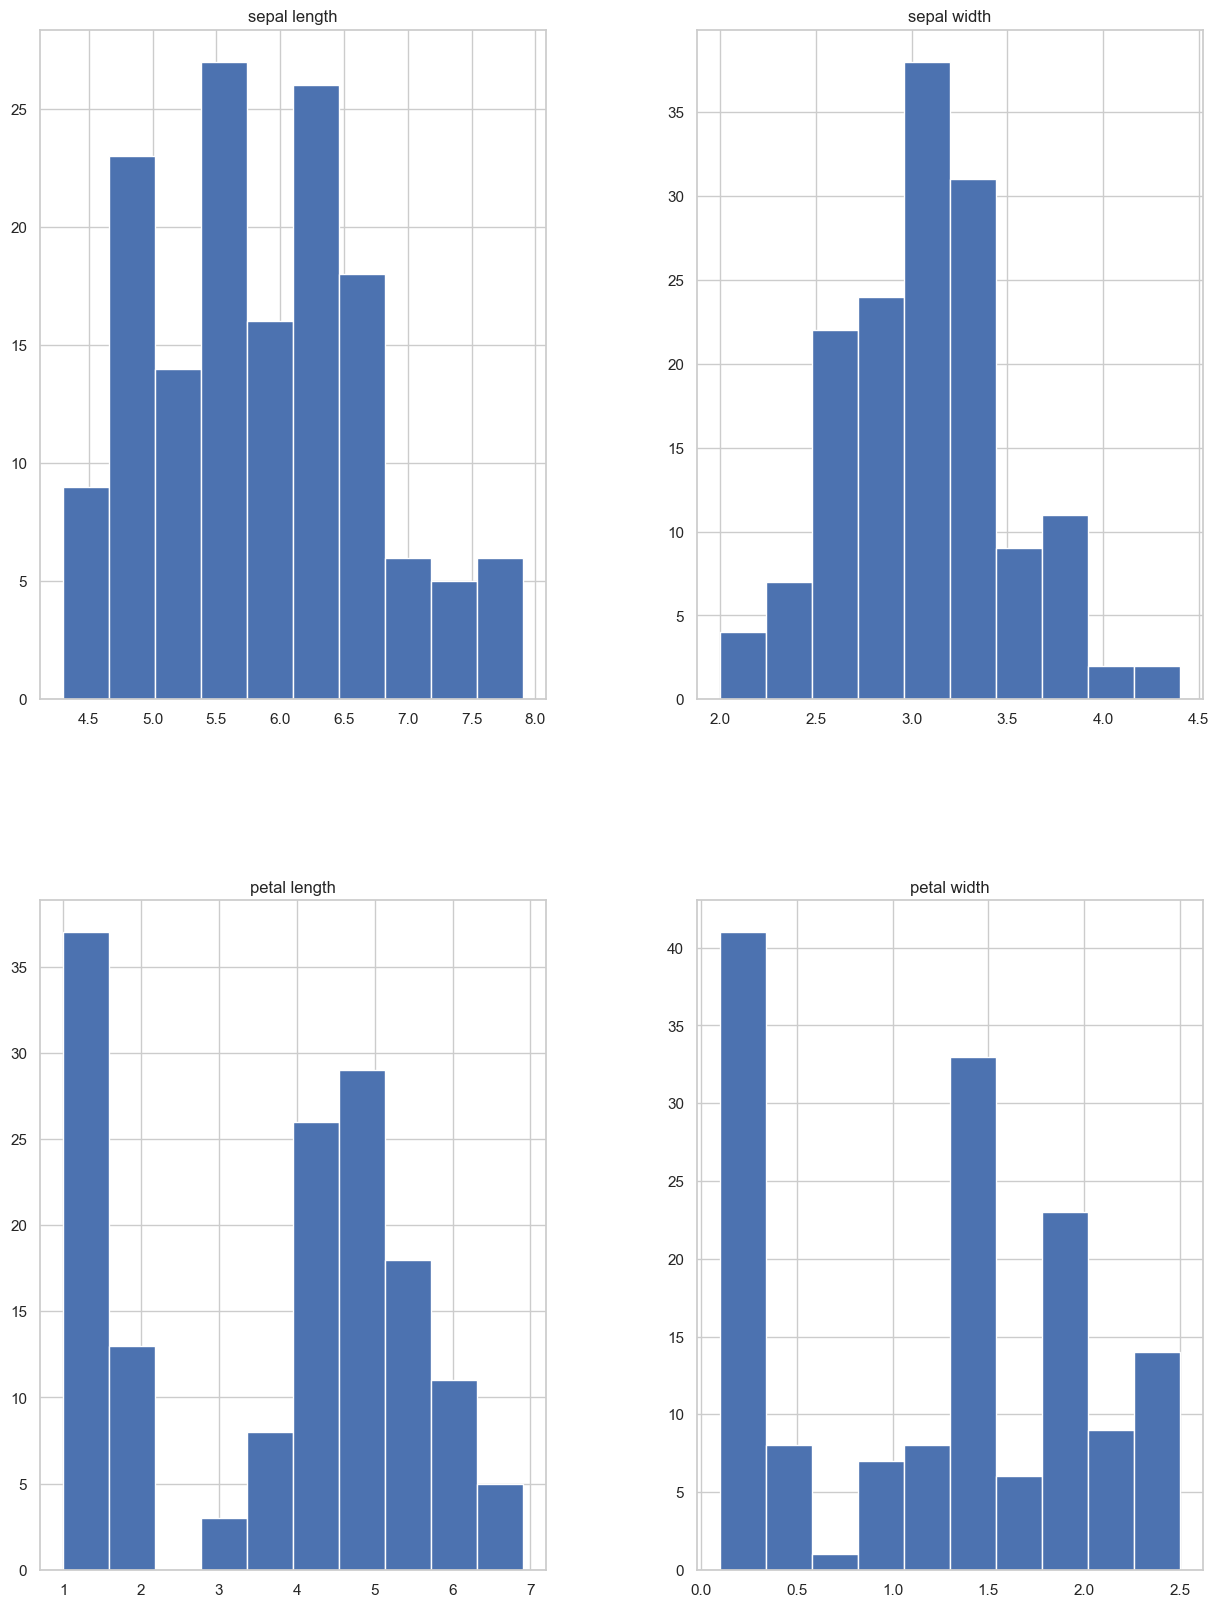

In [35]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

# feature와 label 나누기

In [36]:
X=df.drop('class',axis=1)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
y=df['class']
y.value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [38]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

# 원-핫 인코딩

In [39]:
Y = pd.get_dummies(y).values

# 딥러닝 입력을 위해 Numpy로 변환

In [40]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
X = X.values

In [42]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [43]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [44]:
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

# Train 데이터와 Test 데이터 나누기

In [45]:
# split X_train, Y_train, X_test, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [46]:
X_train.shape[1]

4

손실함수

- Binary Crossentropy
    
    이 손실 함수는 이진 분류 문제(binary classification)에 사용됩니다. 
    여기서 모델은 단 두 개의 클래스 중 하나를 예측해야 합니다.
    보통 시그모이드 활성화 함수(sigmoid activation function)를 출력 계층에 사용합니다. 
    이 함수는 0과 1 사이의 값을 반환하여, 각 클래스에 속할 확률을 나타냅니다.
    
- Categorical Crossentropy
    
    다중 클래스 분류 문제(multi-class classification)에 사용됩니다. 
    모델은 두 개 이상의 클래스 중 하나를 예측해야 합니다 
    소프트맥스 활성화 함수(softmax activation function)가 일반적으로 사용됩니다. 
    이 함수는 모든 클래스에 대해 확률 분포를 반환하여, 각 클래스에 속할 확률을 나타냅니다.

# 모델 정의

In [47]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential() # 각 레이어를 순차적으로 쌓아 구성하는 방식

model.add(Dense(10,input_shape=(4,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy']) # optimizer : Adam(경사하강법의 한 종류), metrics : 모델의 성능을 평가하는 평가지표

model.summary()

C:\Users\황주신\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

# 모델 Fit

In [48]:
model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(Y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.3264 - loss: 1.0927 - val_accuracy: 0.4167 - val_loss: 1.1341
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6294 - loss: 1.0110 - val_accuracy: 0.5833 - val_loss: 0.9127
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7205 - loss: 0.8451 - val_accuracy: 0.5833 - val_loss: 0.7254
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6971 - loss: 0.6441 - val_accuracy: 0.5833 - val_loss: 0.6887
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6856 - loss: 0.5969 - val_accuracy: 0.5833 - val_loss: 0.5863
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7345 - loss: 0.4672 - val_accuracy: 0.9167 - val_loss: 0.2413
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9644 - loss: 0.2542 - val_accuracy: 0.9167 - val_loss: 0.2788
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9251 - loss: 0.1992 - val_accuracy: 0.9167 - val_loss: 0.2511


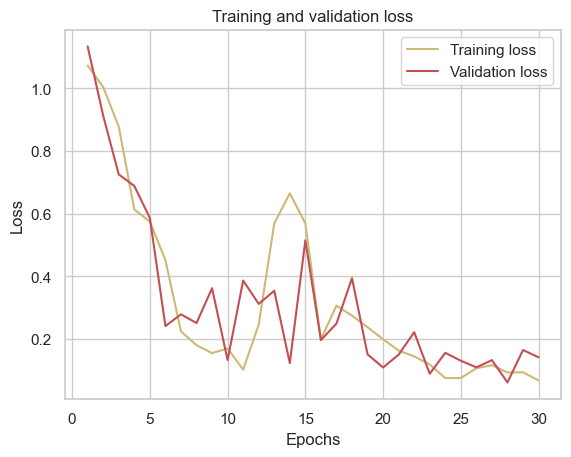

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

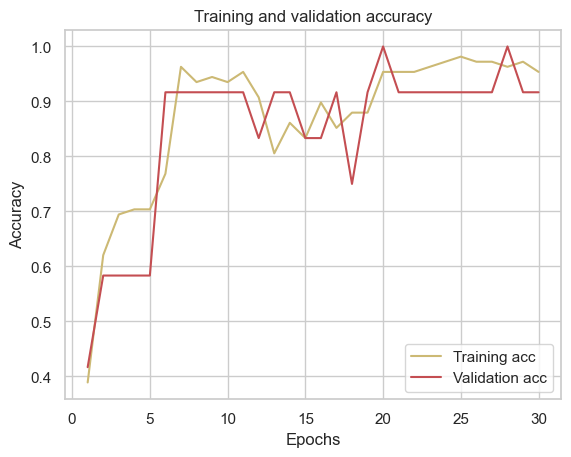

In [50]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
